<a href="https://colab.research.google.com/github/BaDybala/Computational-Physics-Projects/blob/main/Probability%20-%20Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


## Simulate data


In this notebook we will simulate some data using a random number generator. There are several ways of doing this in Python. We will use the `numpy.random` [package](https://numpy.org/doc/stable/reference/random/index.html), but we could also use the `scipy.stats` [package](https://https://docs.scipy.org/doc/scipy/reference/stats.html).

In [ ]:
# create an instance of the default random number generator
rng = np.random.default_rng()
# If you want the results to be the same every time you run this notebook, you can initialise the random number generator using a "seed"
# rng.np.random.default_rng(1234)


Simulate throwing a fair 6-sided die 100 times

In [ ]:
# Draw 100 numbers from a uniform distribution between 1 and 6
nsamp = 100
low, high = 1, 7 # note `high' must be 1 above the maximum desired value
sample = rng.integers(low,high,nsamp)
print(sample)

[2 5 4 5 1 4 6 6 6 6 1 3 2 1 2 4 4 4 5 5 6 3 4 3 2 2 6 1 4 5 1 1 2 3 5 1 2
 5 1 4 2 3 3 5 6 1 3 4 6 3 5 6 6 4 5 1 3 5 5 2 3 4 4 6 5 1 4 5 5 5 1 5 6 5
 1 6 1 3 4 2 1 5 2 6 3 4 4 1 2 6 1 3 4 3 5 2 6 2 1 6]


Text(0, 0.5, 'f(x)')

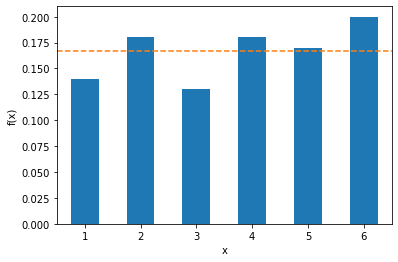

In [ ]:
# plot a histogram
plt.hist(sample,range=(low-0.5,high+0.5),bins=(high-low+1),histtype='bar', rwidth = 0.5, density=True)
plt.axhline(1/(high-low),c='C1',ls='--')
plt.xlim(low-0.5,high-0.5)
plt.xlabel('x')
plt.ylabel('f(x)');

Now let's do this again 10 times, storing the results each time

(0.5, 6.5)

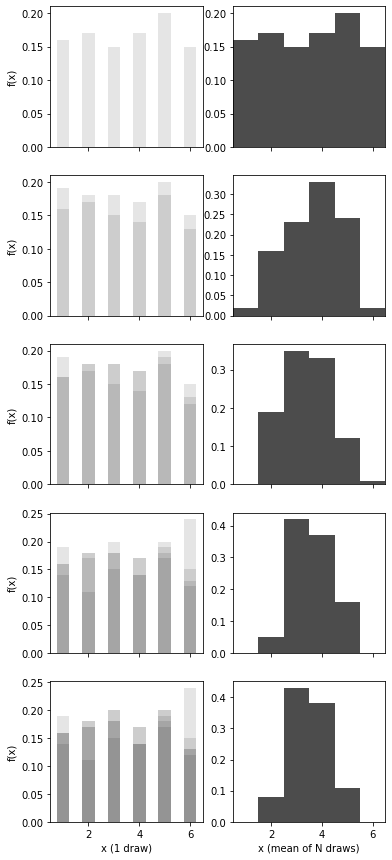

In [ ]:
nsim=5
import time
sample_t = np.zeros((nsim,nsamp), 'int')
fig,axes=plt.subplots(nsim,2,sharex=True,sharey=False,figsize=(6,3*nsim))
for i in range(nsim):
  axes[i,0].set_ylabel('f(x)')
  sample = rng.integers(low, high, size=nsamp)
  sample_t[i,:] = sample
  sample_s = sample_t.sum(axis=0)
  for j in range(nsim-i):
    axes[nsim-j-1,0].hist(sample,range=(low-0.5,high+0.5),bins=(high-low+1),histtype='bar', density=True,alpha=0.1,color='k', rwidth=0.5)
  axes[i,1].hist(sample_s/(i+1),range=(low-0.5,high+0.5),bins=(high-low+1),histtype='stepfilled', density=True,alpha=0.7,color='k')
  axes[-1,0].set_xlabel('x (1 draw)')
axes[-1,1].set_xlabel('x (mean of N draws)')
plt.xlim(low-0.5,high-0.5)


## Normal distribution


In [ ]:
# Draw 100 numbers from a normal distribution between with mean 0 and variance 1
nsamp = 100
mu, sig = 0, 1 # note `high' must be 1 above the maximum desired value
sample = rng.normal(mu, sig,nsamp)
print(sample)

[ 0.16958966 -0.97175952 -0.01707474  0.12392014  0.09006581  1.53830247
 -1.01164285  0.35428581 -0.59157606  1.26477192 -2.15404422  0.10897232
  0.4789682   1.86590149  1.71010524 -1.46425753  0.84657233 -0.45198217
  1.00202584 -0.19922343  0.38501371  2.16783908  0.0475915   1.02644685
 -0.37715014  0.19321042  1.30886333 -0.29294693  0.35855776  1.40935187
 -0.85663526 -0.65601001  0.20493979 -1.2298292  -0.96571003 -2.02704821
 -0.44584784  0.40935603 -0.45373357 -0.27667069  1.02965441  0.36585205
  1.01908074 -0.5972247  -0.26571445 -1.37392419  1.75416159  0.08124576
 -1.10987081 -0.3557403   0.02573781 -0.1403357   1.12789843 -0.69335127
  0.57864707 -1.43583495  2.48695329  0.16965978  0.17420653  0.46450491
 -0.31999313  2.50892099  0.00289762 -0.08907823  2.82986598 -0.64979708
 -1.80232837  0.78786648  1.52665178 -0.54461663  1.6580168   0.32528975
  0.45002054  2.16820727  0.27861064  1.50558991 -0.30057895 -1.23584315
  0.82715802 -0.33325499  0.27370986  0.39248353  0

(array([0.  , 0.  , 0.  , 0.06, 0.27, 0.4 , 0.23, 0.04, 0.  , 0.  , 0.  ]), array([-5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,
        5.5]), <a list of 1 Patch objects>)


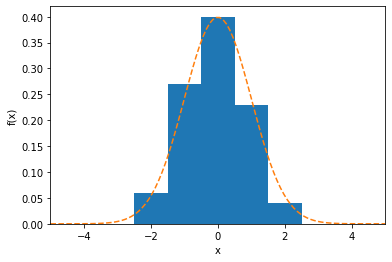

In [ ]:
# plot a histogram
res = plt.hist(sample,range=(mu-sig*5.5,mu+sig*5.5),bins=11,histtype='stepfilled', density=True)
print(res)
x = np.linspace(mu-sig*5,mu+sig*5,100)
g = np.exp(-(x-mu)**2/2/sig**2) / np.sqrt(2*np.pi*sig**2)
plt.plot(x,g,'C1--')
plt.xlim(mu-sig*5,mu+sig*5)
plt.xlabel('x')
plt.ylabel('f(x)');

Now let's do this again 10 times, storing the results each time

(-5.0, 5.0)

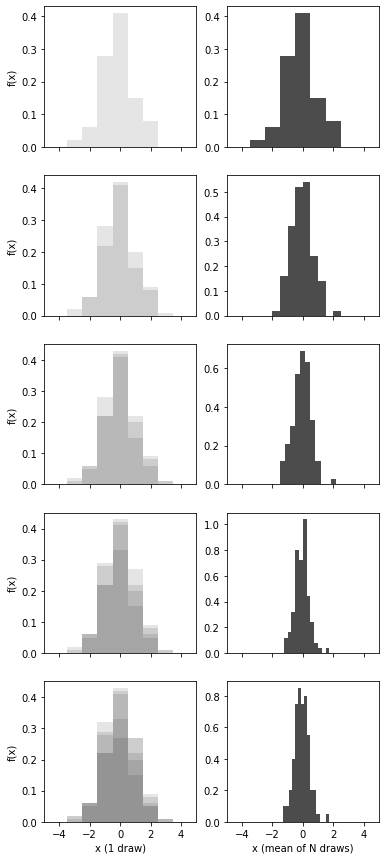

In [ ]:
nsim=5
import time
sample_t = np.zeros((nsim,nsamp))
fig,axes=plt.subplots(nsim,2,sharex=True,sharey=False,figsize=(6,3*nsim))
for i in range(nsim):
  axes[i,0].set_ylabel('f(x)')
  sample = rng.normal(mu, sig, size=nsamp)
  sample_t[i,:] = sample
  sample_s = sample_t.sum(axis=0)
  for j in range(nsim-i):
    axes[nsim-j-1,0].hist(sample,range=(mu-sig*5.5,mu+sig*5.5),bins=11,histtype='stepfilled', density=True,alpha=0.1,color='k', rwidth=0.5)
  axes[i,1].hist(sample_s/(i+1),range=(mu-sig*5.5,mu+sig*5.5),bins=11*(i+1),histtype='stepfilled', density=True,alpha=0.7,color='k')
axes[-1,0].set_xlabel('x (1 draw)')
axes[-1,1].set_xlabel('x (mean of N draws)')
plt.xlim(mu-sig*5,mu+sig*5)
